In [298]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [299]:
# Load the dataset
df = pd.read_csv('data.csv')

# Quick look
print("First 5 rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1.0,3.0,3.0,1967.0,1.0,1.0,48.0,8.297631,5.935734,6021
1,2,287.678577,1.0,2.0,1.0,1949.0,0.0,1.0,37.0,6.061466,10.827392,5914
2,3,232.998485,1.0,3.0,2.0,1923.0,1.0,0.0,14.0,2.911442,6.904599,4645
3,4,199.664621,5.0,2.0,2.0,1918.0,0.0,0.0,17.0,2.070949,8.284019,5831
4,5,89.004660,4.0,3.0,3.0,1999.0,1.0,0.0,34.0,1.523278,14.648277,6199



Missing values in each column:
ID                    0
Square_Feet           5
Num_Bedrooms          6
Num_Bathrooms         1
Num_Floors            3
Year_Built            2
Has_Garden            6
Has_Pool              1
Garage_Size           4
Location_Score        1
Distance_to_Center    1
Price                 0
dtype: int64


In [300]:
# Drop rows with missing values
df = df.dropna()

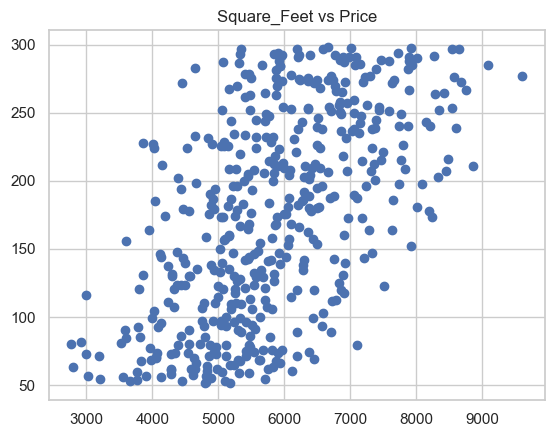

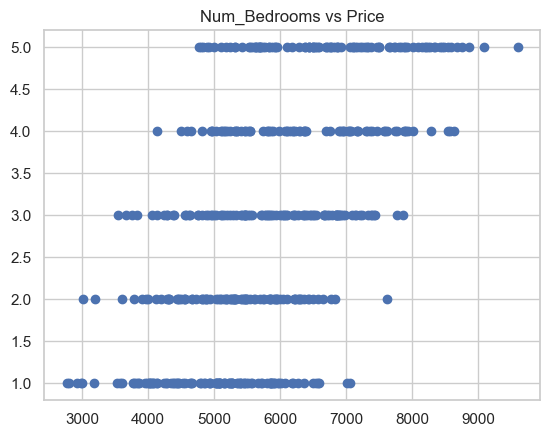

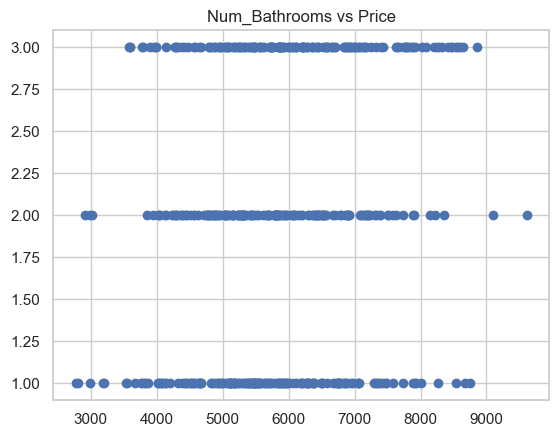

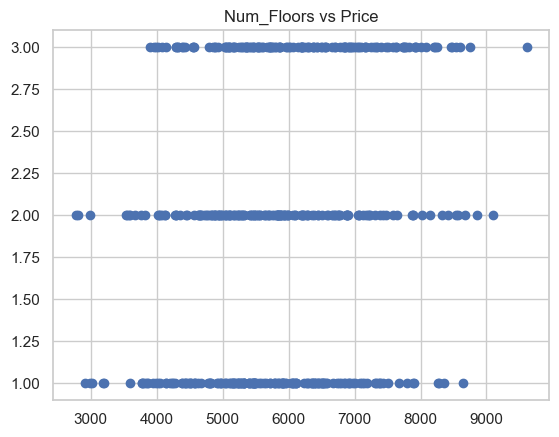

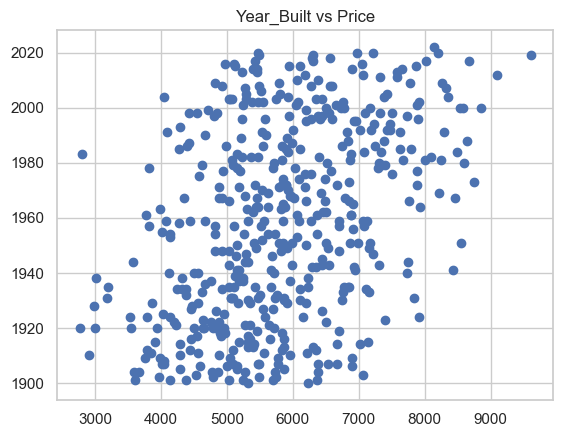

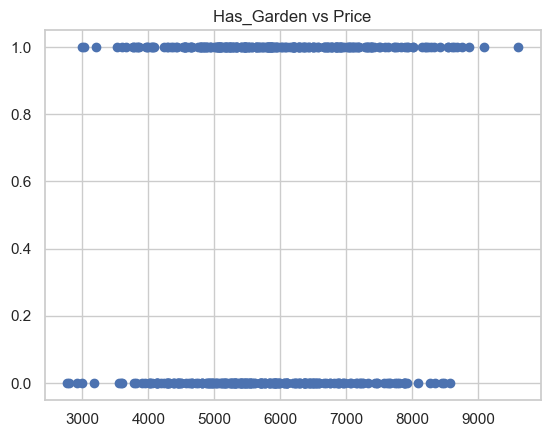

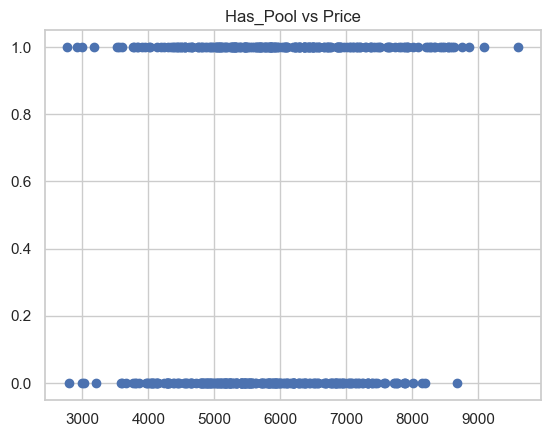

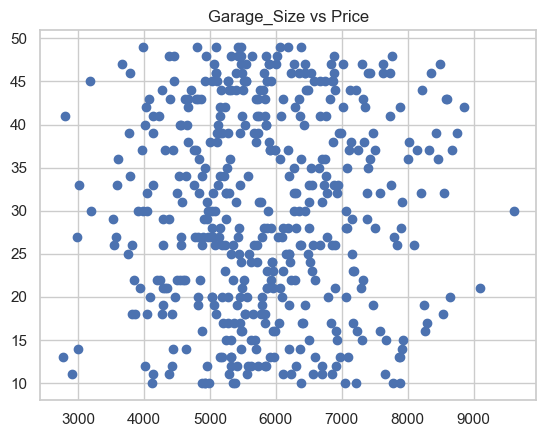

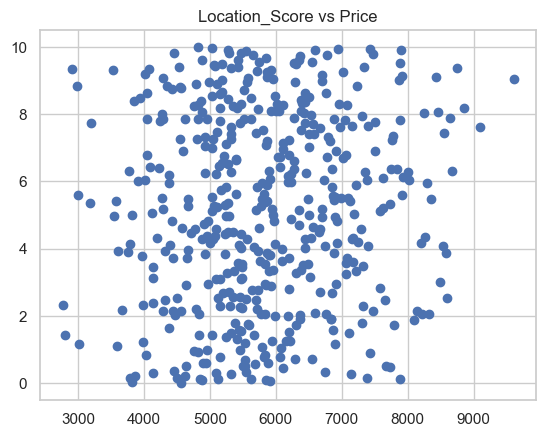

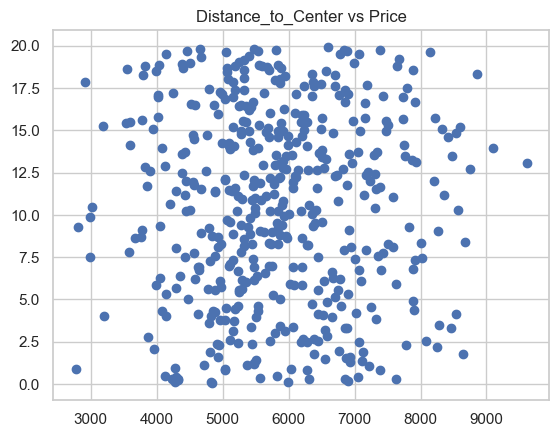

In [301]:
# Scatter plots with target
initial_columns = df.columns[1:-1]  # Exclude first column (ID) and last column (price)
target_column = df.columns[-1]  #last column (price) is target
for col in initial_columns:
    plt.figure()
    plt.scatter(data=df, x=target_column, y=col)
    plt.title(f"{col} vs {target_column}")
    plt.show()


In [302]:
# Separate features and target
X = df[initial_columns].values
y = df[target_column].values.reshape(-1, 1)

# Solve for weights using Normal Equation
delta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Learned Weights:")
print(delta)

# Make predictions
y_pred = X @ delta

Learned Weights:
[[  9.64308588]
 [497.78356365]
 [251.79066874]
 [219.24130091]
 [  0.59062687]
 [254.69908107]
 [404.69847393]
 [  9.57266843]
 [ 42.35799965]
 [-23.18298497]]


In [303]:
# Mean Squared Error
mse = np.mean((y - y_pred) ** 2)

# Residual Sum of Squares
rss = np.sum((y - y_pred) ** 2)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Residual Sum of Squares (RSS): {rss:.4f}")



Mean Squared Error (MSE): 295837.2349
Residual Sum of Squares (RSS): 139043500.3806


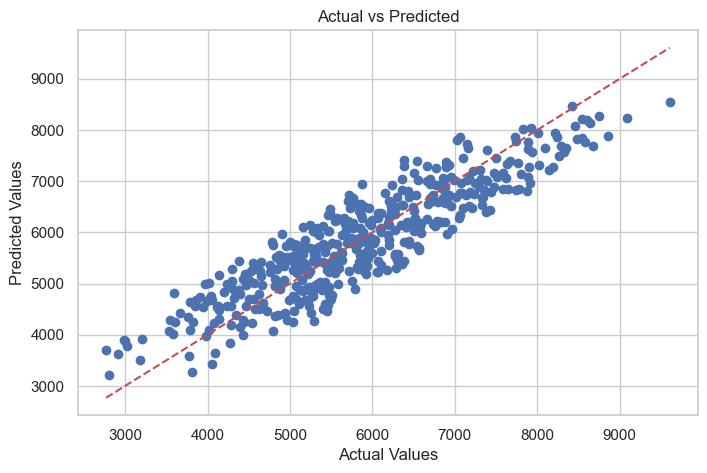

In [304]:
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Diagonal line for reference
plt.show()